In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
# 한글 폰트 설정 (Colab 환경에서 필요한 경우)
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [ ]:
# 데이터셋 URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# 데이터셋의 열 이름 정의
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# 데이터 불러오기
# names 파라미터로 열 이름을 지정하고, na_values로 결측치 문자를 지정합니다.
# strip() 함수를 사용하여 각 열의 값 앞뒤에 있을 수 있는 공백을 제거합니다.
df = pd.read_csv(url, header=None, names=column_names,
                 na_values='?', sep=',\s*', engine='python')

# 데이터의 첫 5행 확인
print("데이터 샘플 (상위 5개):")
print(df.head())


데이터 샘플 (상위 5개):
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0           

In [ ]:
# 데이터의 차원 확인 (행, 열 개수)
print(f"데이터 차원: {df.shape}")

# 데이터의 전반적인 정보 확인
print("\n데이터 기본 정보:")
df.info()


데이터 차원: (32561, 15)

데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# 각 열의 결측치 개수 확인
print("열별 결측치 개수:")
print(df.isnull().sum())

# 결측치 비율 계산
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\n열별 결측치 비율 (%):")
print(missing_percentage[missing_percentage > 0])


열별 결측치 개수:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

열별 결측치 비율 (%):
workclass         5.638647
occupation        5.660146
native-country    1.790486
dtype: float64


In [ ]:
# workclass가 결측치인 행에서 occupation 열의 상태 확인
missing_workclass_rows = df[df['workclass'].isnull()]
print(f"workclass가 결측치인 행의 수: {len(missing_workclass_rows)}")
print(f"그 중 occupation도 결측치인 행의 수: {missing_workclass_rows['occupation'].isnull().sum()}")


workclass가 결측치인 행의 수: 1836
그 중 occupation도 결측치인 행의 수: 1836


####결측치는 구조적 이유가 있음을 확인, 결측 상태 자체를 하나의 범주로 만들기

In [ ]:
# workclass와 occupation의 결측치를 'Unknown'으로 채우기
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)

# native-country는 결측치 비율이 낮고, 대부분이 'United-States'이므로 최빈값으로 채우거나 행을 제거할 수 있습니다.
# 여기서는 분석의 일관성을 위해 최빈값으로 채우겠습니다.
mode_country = df['native-country'].mode()
df['native-country'].fillna(mode_country, inplace=True)

# 결측치가 모두 처리되었는지 다시 확인
print("\n결측치 처리 후 데이터 정보:")
df.info()



결측치 처리 후 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


/tmp/ipython-input-6-3984632706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna('Unknown', inplace=True)
/tmp/ipython-input-6-3984632706.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
# income 열의 고유값 확인
print("\nIncome 변수의 고유값:")
print(df['income'].value_counts())

# income 열을 0과 1로 변환하여 새로운 열 'income_binary' 생성
df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# 변환 결과 확인
print("\nIncome 변수 변환 후 (상위 5개):")
print(df[['income', 'income_binary']].head())



Income 변수의 고유값:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Income 변수 변환 후 (상위 5개):
  income  income_binary
0  <=50K              0
1  <=50K              0
2  <=50K              0
3  <=50K              0
4  <=50K              0


In [ ]:
# 수치형 데이터의 기술 통계량 확인
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  income_binary  
count    32561.000000   32561.000000  
mean        40.437456       0.240810  
std         12.347429       0.427581  
min          1.000000       0.000000  
25%         40.000000       0.000000  
50%         40.000000       0.000000  
75%   

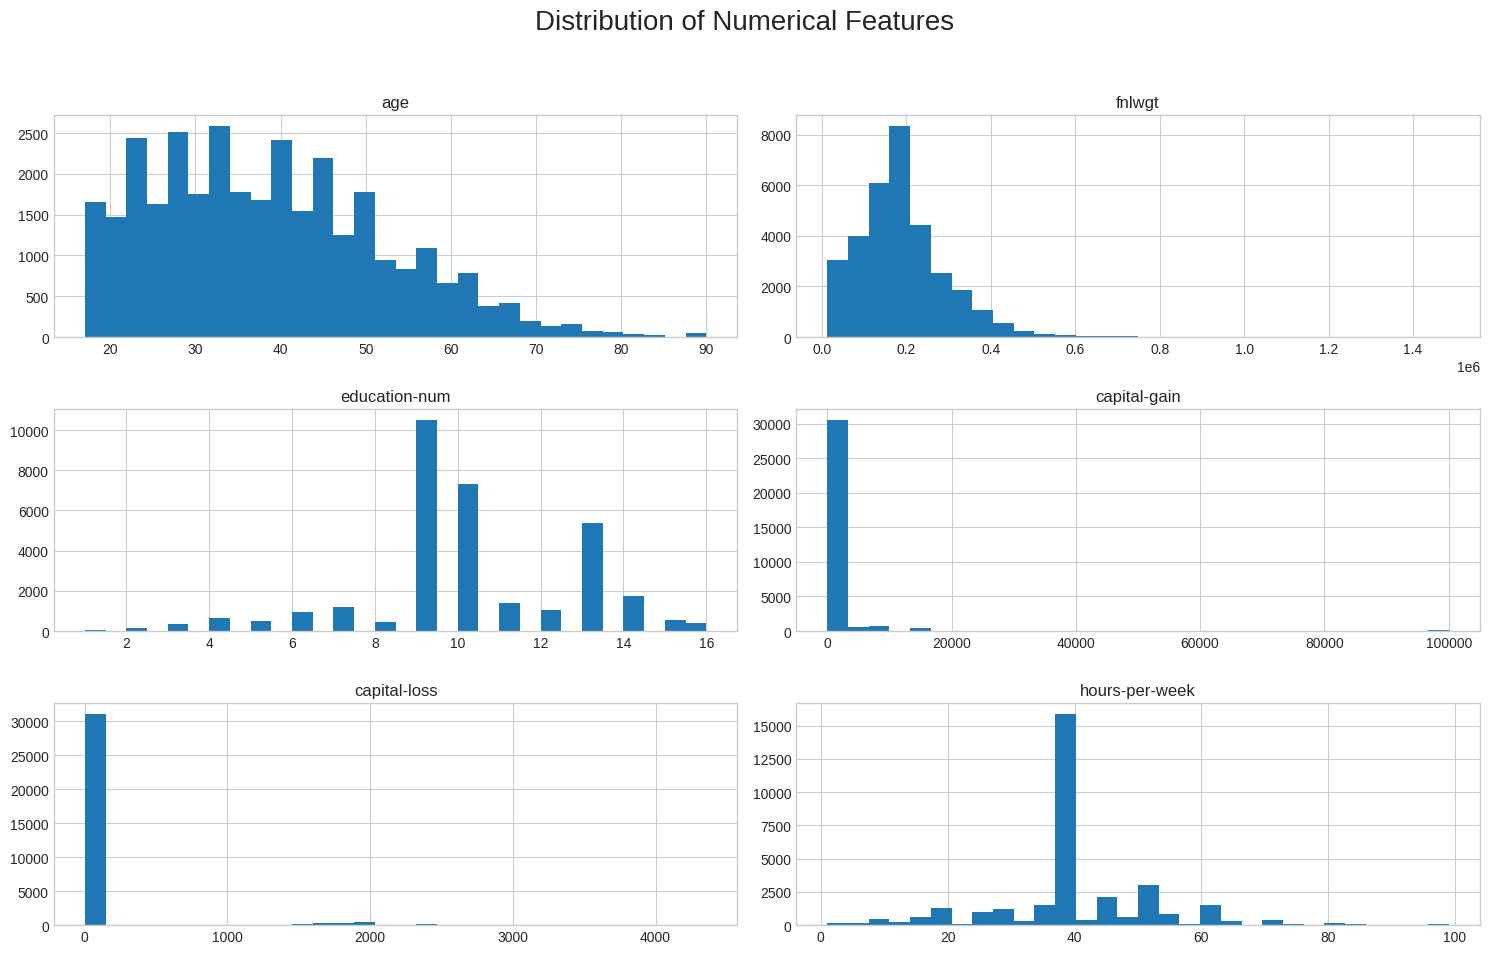

In [ ]:
# 수치형 변수 리스트
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# 히스토그램으로 분포 확인
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", size=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/tmp/ipython-input-11-1072192624.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, ax=axes[i], palette='viridis')
/tmp/ipython-input-11-1072192624.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, ax=axes[i], palette='viridis')
/tmp/ipython-input-11-1072192624.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, ax=axes[i], palette='viridis')
/tmp/ipython-input-11-1072192624.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is d

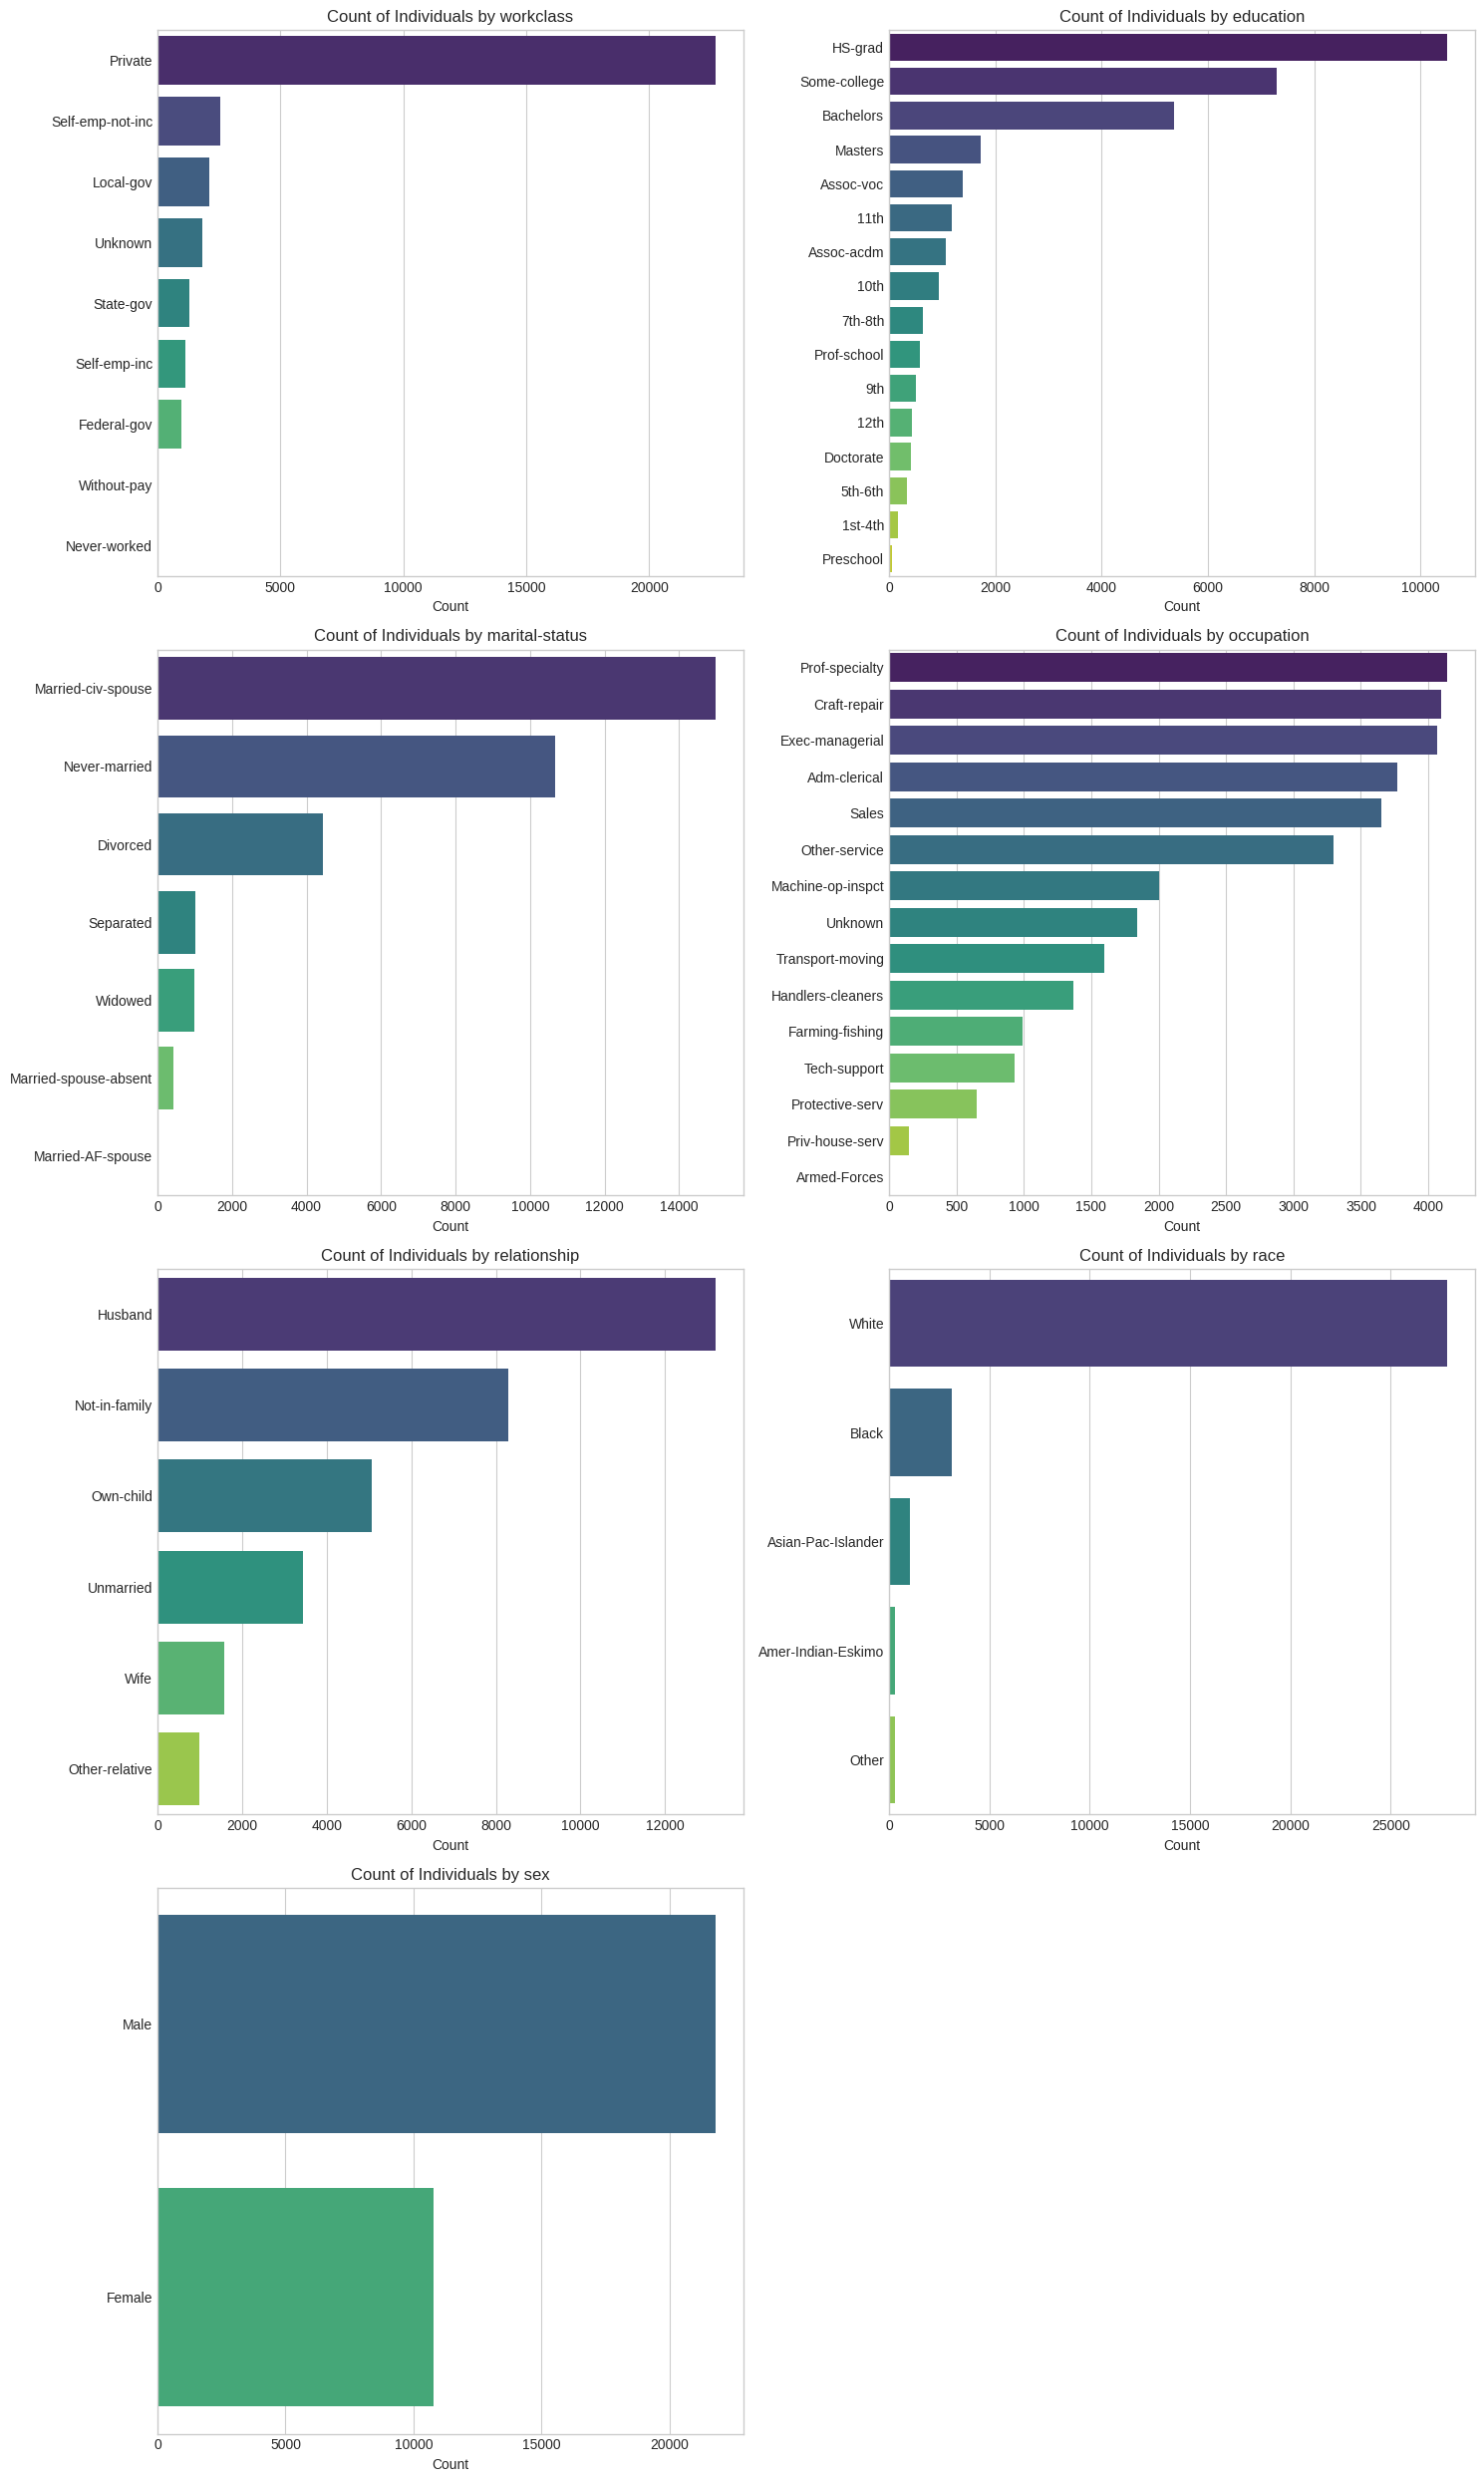

In [ ]:
# 주요 범주형 변수 리스트
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

# 각 범주형 변수에 대한 countplot 그리기
fig, axes = plt.subplots(4, 2, figsize=(15, 25))
axes = axes.flatten() # 2차원 배열을 1차원으로 변환

for i, col in enumerate(categorical_features):
    order = df[col].value_counts().index
    sns.countplot(y=col, data=df, order=order, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count of Individuals by {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

# 마지막 subplot이 비어있으면 숨기기
if len(categorical_features) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


<=50K 비율: 75.92%
>50K 비율: 24.08%


/tmp/ipython-input-12-813917705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='magma')


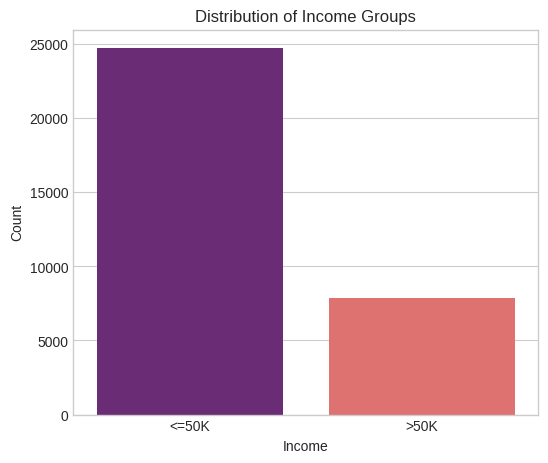

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='income', data=df, palette='magma')
plt.title('Distribution of Income Groups')
plt.xlabel('Income')
plt.ylabel('Count')

# 비율 출력
income_counts = df['income'].value_counts(normalize=True) * 100
print(f"<=50K 비율: {income_counts['<=50K']:.2f}%")
print(f">50K 비율: {income_counts['>50K']:.2f}%")

plt.show()


####데이터는 약 76%가 연 소득 5만 달러 이하(<=50K), 약 24%가 5만 달러 초과(>50K)로 구성

#### 교육 수준별 고소득자 비율 시각화


/tmp/ipython-input-13-3347613497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_binary', y='education', data=prop_df, palette='coolwarm')


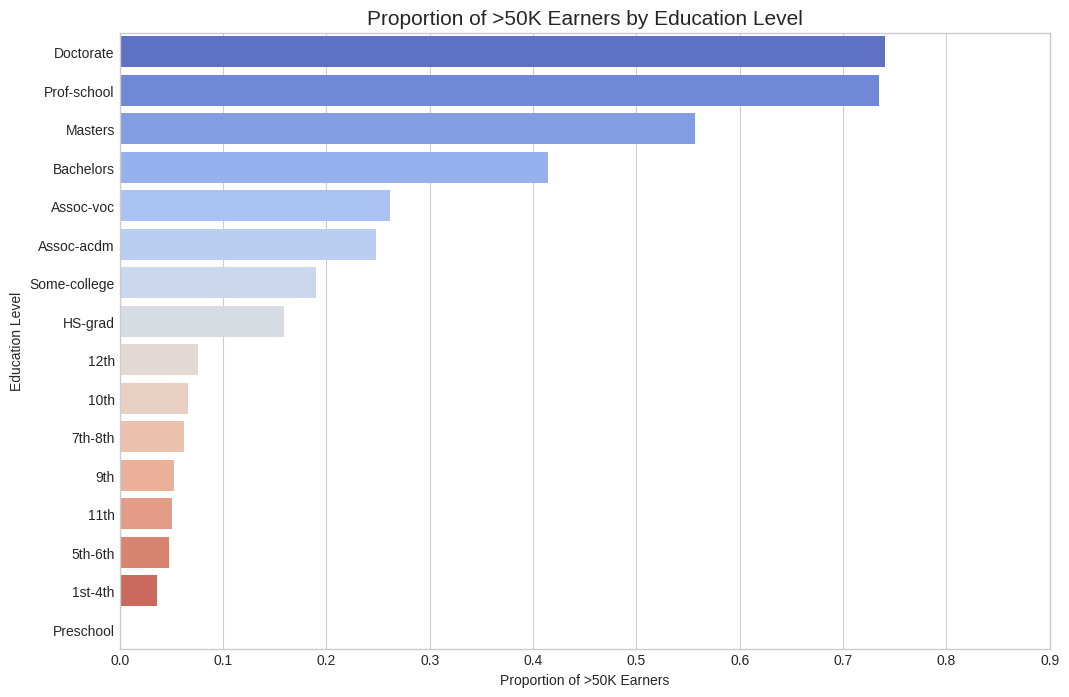

In [ ]:
plt.figure(figsize=(12, 8))
# 각 education 카테고리 내에서 income 비율을 계산하여 정규화된 막대 그래프를 그립니다.
prop_df = df.groupby('education')['income_binary'].mean().reset_index().sort_values('income_binary', ascending=False)
sns.barplot(x='income_binary', y='education', data=prop_df, palette='coolwarm')
plt.title('Proportion of >50K Earners by Education Level', fontsize=15)
plt.xlabel('Proportion of >50K Earners')
plt.ylabel('Education Level')
plt.xticks(np.arange(0, 1.0, 0.1))
plt.show()


##### 고학력자일수록 고소득자의 비중이 높다.

####인종

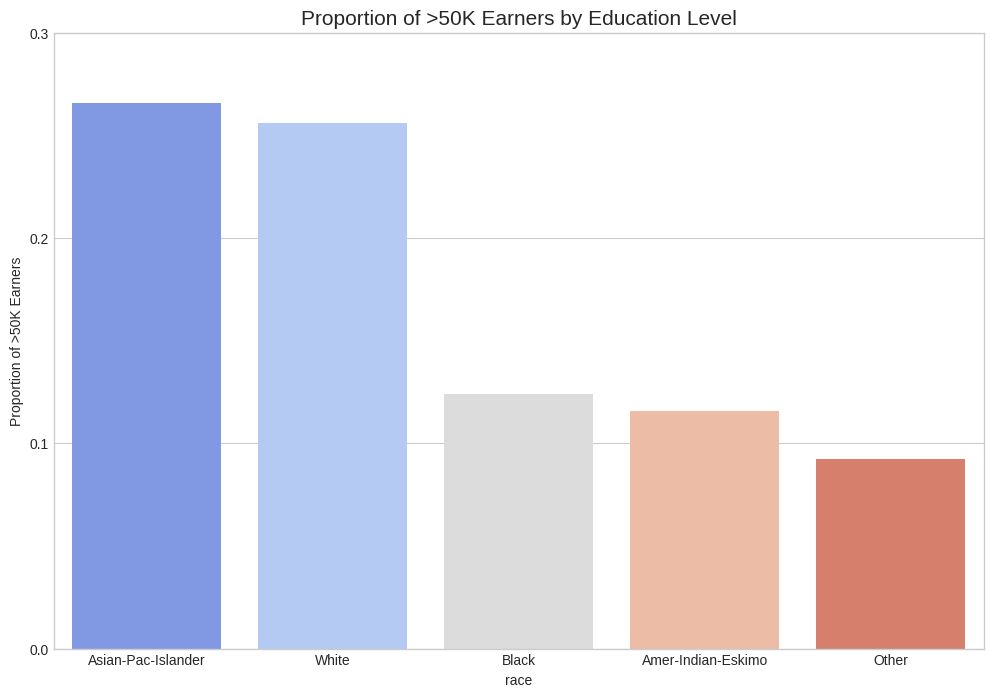

In [ ]:
plt.figure(figsize=(12, 8))
# 각 race 카테고리 내에서 income 비율을 계산하여 정규화된 막대 그래프를 그립니다.
prop_df = df.groupby('race')['income_binary'].mean().reset_index().sort_values('income_binary', ascending=False)
sns.barplot(x='race', y='income_binary', data=prop_df, palette='coolwarm')
plt.title('Proportion of >50K Earners by Education Level', fontsize=15)
plt.ylabel('Proportion of >50K Earners')
plt.xlabel('race')
plt.yticks(np.arange(0, 0.4, 0.1))
plt.show()

#####아까 위의 그래프에서 보았을 때 전체 인구 중 고소득자의 비중은 백인이 가장 높았는데 인종별 고소득자의 비율을 보았을 때에는 asian계가 장 높다는 것을 확인할 수 있다.

####나이

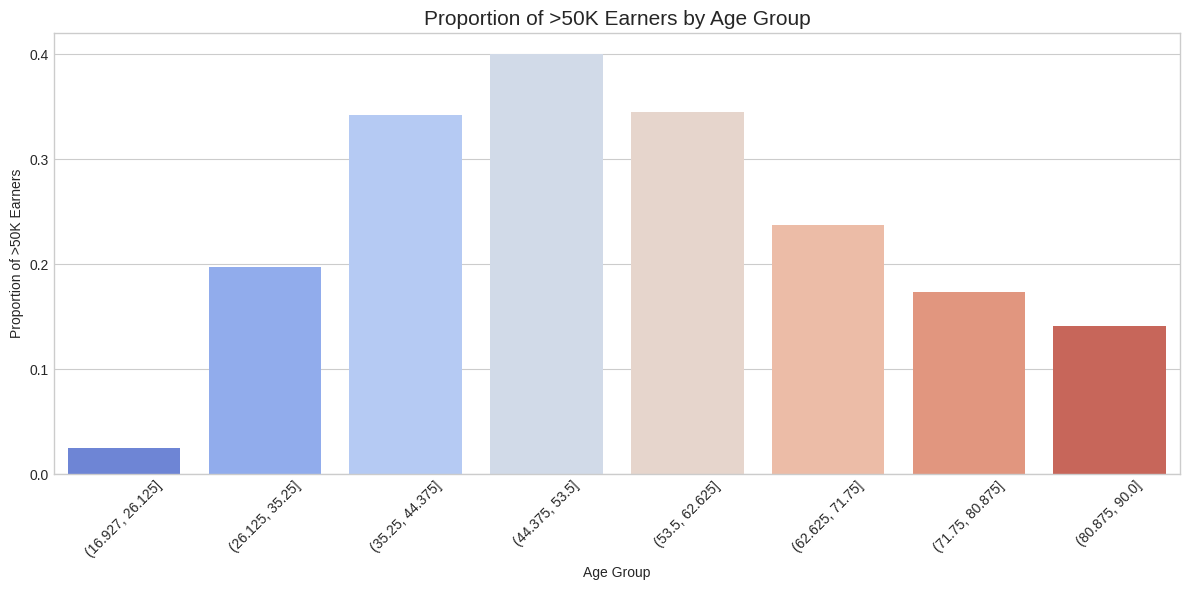

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 나이를 8구간으로 나누기
df['age_bin'] = pd.cut(df['age'], bins=8)

# age_bin별 고소득자 비율 계산
prop_df = df.groupby('age_bin')['income_binary'].mean().reset_index().sort_values('age_bin')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='age_bin', y='income_binary', data=prop_df, palette='coolwarm')

plt.title('Proportion of >50K Earners by Age Group', fontsize=15)
plt.ylabel('Proportion of >50K Earners')
plt.xlabel('Age Group')
plt.yticks(np.arange(0, 0.45, 0.1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#####연령대별 고소득자의 비율을 보았는데 40대 중반에서 50대 중반 사이가 가장 높음을 확인할 수 있다. 해당 나이대에 고위 관리직이나 전문직의 비중이 높기 때문에 직업도 고소득층을 결정하는 유인일 것이라고 추측할 수 있다.

####주당 근무 시간

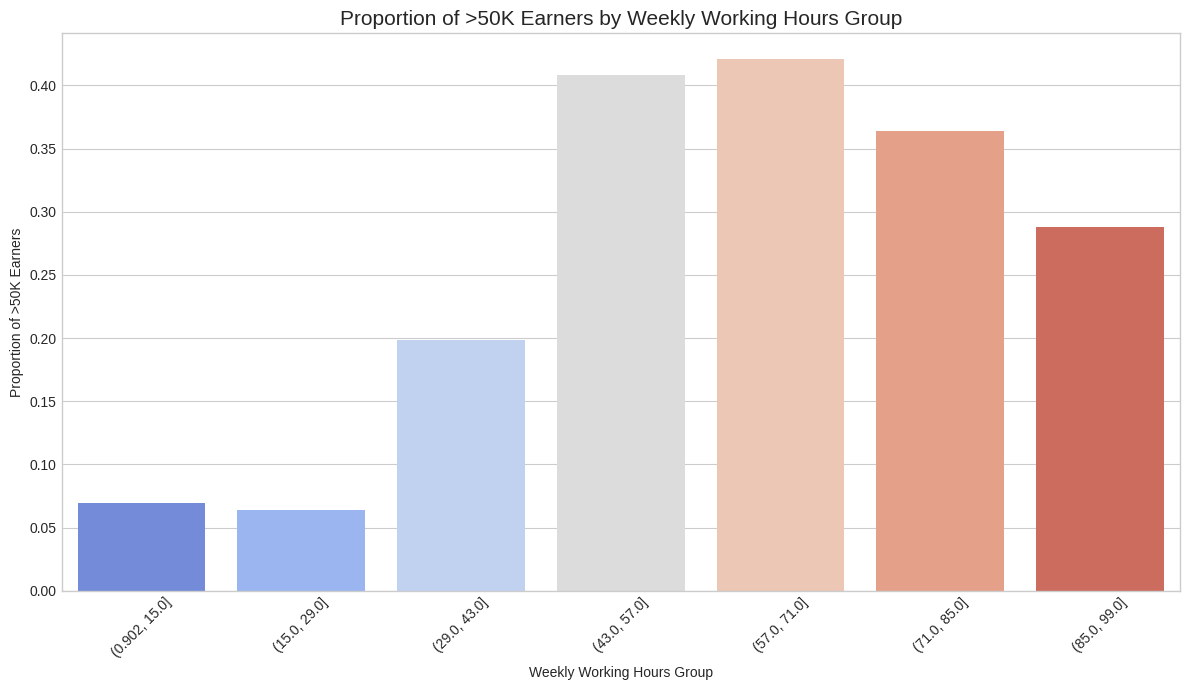

In [ ]:
# 주당 근무시간을 6개의 구간으로 나누기
df['hours_bin'] = pd.cut(df['hours-per-week'], bins=7)

# 각 구간별로 >50K 비율 계산
prop_df = df.groupby('hours_bin')['income_binary'].mean().reset_index().sort_values('hours_bin')

# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(x='hours_bin', y='income_binary', data=prop_df, palette='coolwarm')

plt.title('Proportion of >50K Earners by Weekly Working Hours Group', fontsize=15)
plt.xlabel('Weekly Working Hours Group')
plt.ylabel('Proportion of >50K Earners')
plt.ylim(0, prop_df['income_binary'].max() + 0.02)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####성별

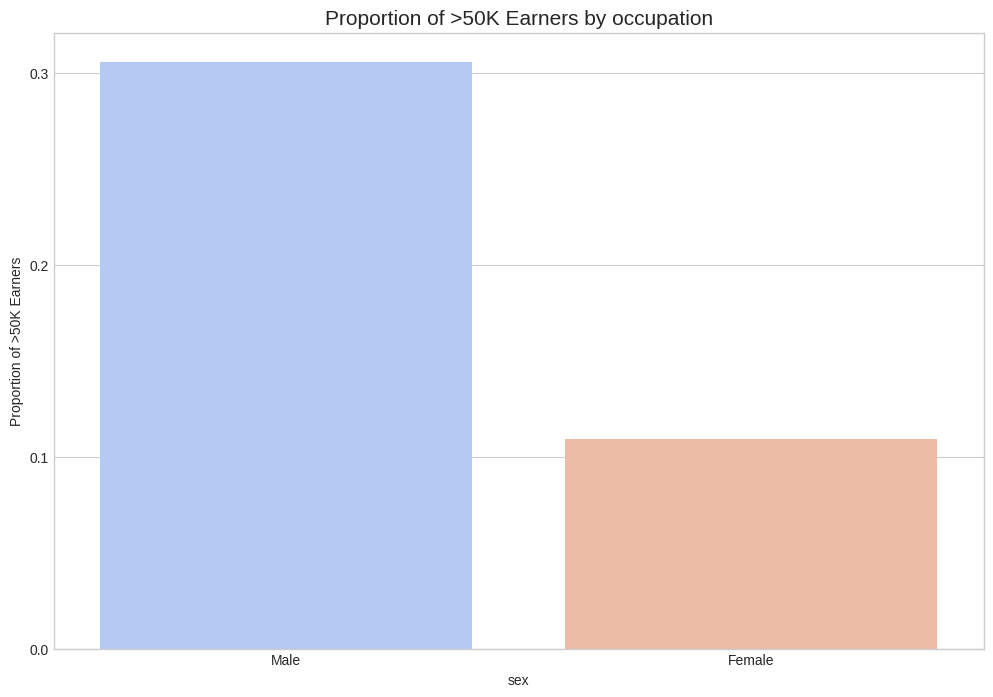

In [ ]:
plt.figure(figsize=(12, 8))
# 각 sex 카테고리 내에서 income 비율을 계산하여 정규화된 막대 그래프를 그립니다.
prop_df = df.groupby('sex')['income_binary'].mean().reset_index().sort_values('income_binary', ascending=False)
sns.barplot(x='sex', y='income_binary', data=prop_df, palette='coolwarm')
plt.title('Proportion of >50K Earners by occupation', fontsize=15)
plt.ylabel('Proportion of >50K Earners')
plt.xlabel('sex')
plt.yticks(np.arange(0, 0.4, 0.1))
plt.show()

######남성이 고소득자의 비중이 높다.

####occupation

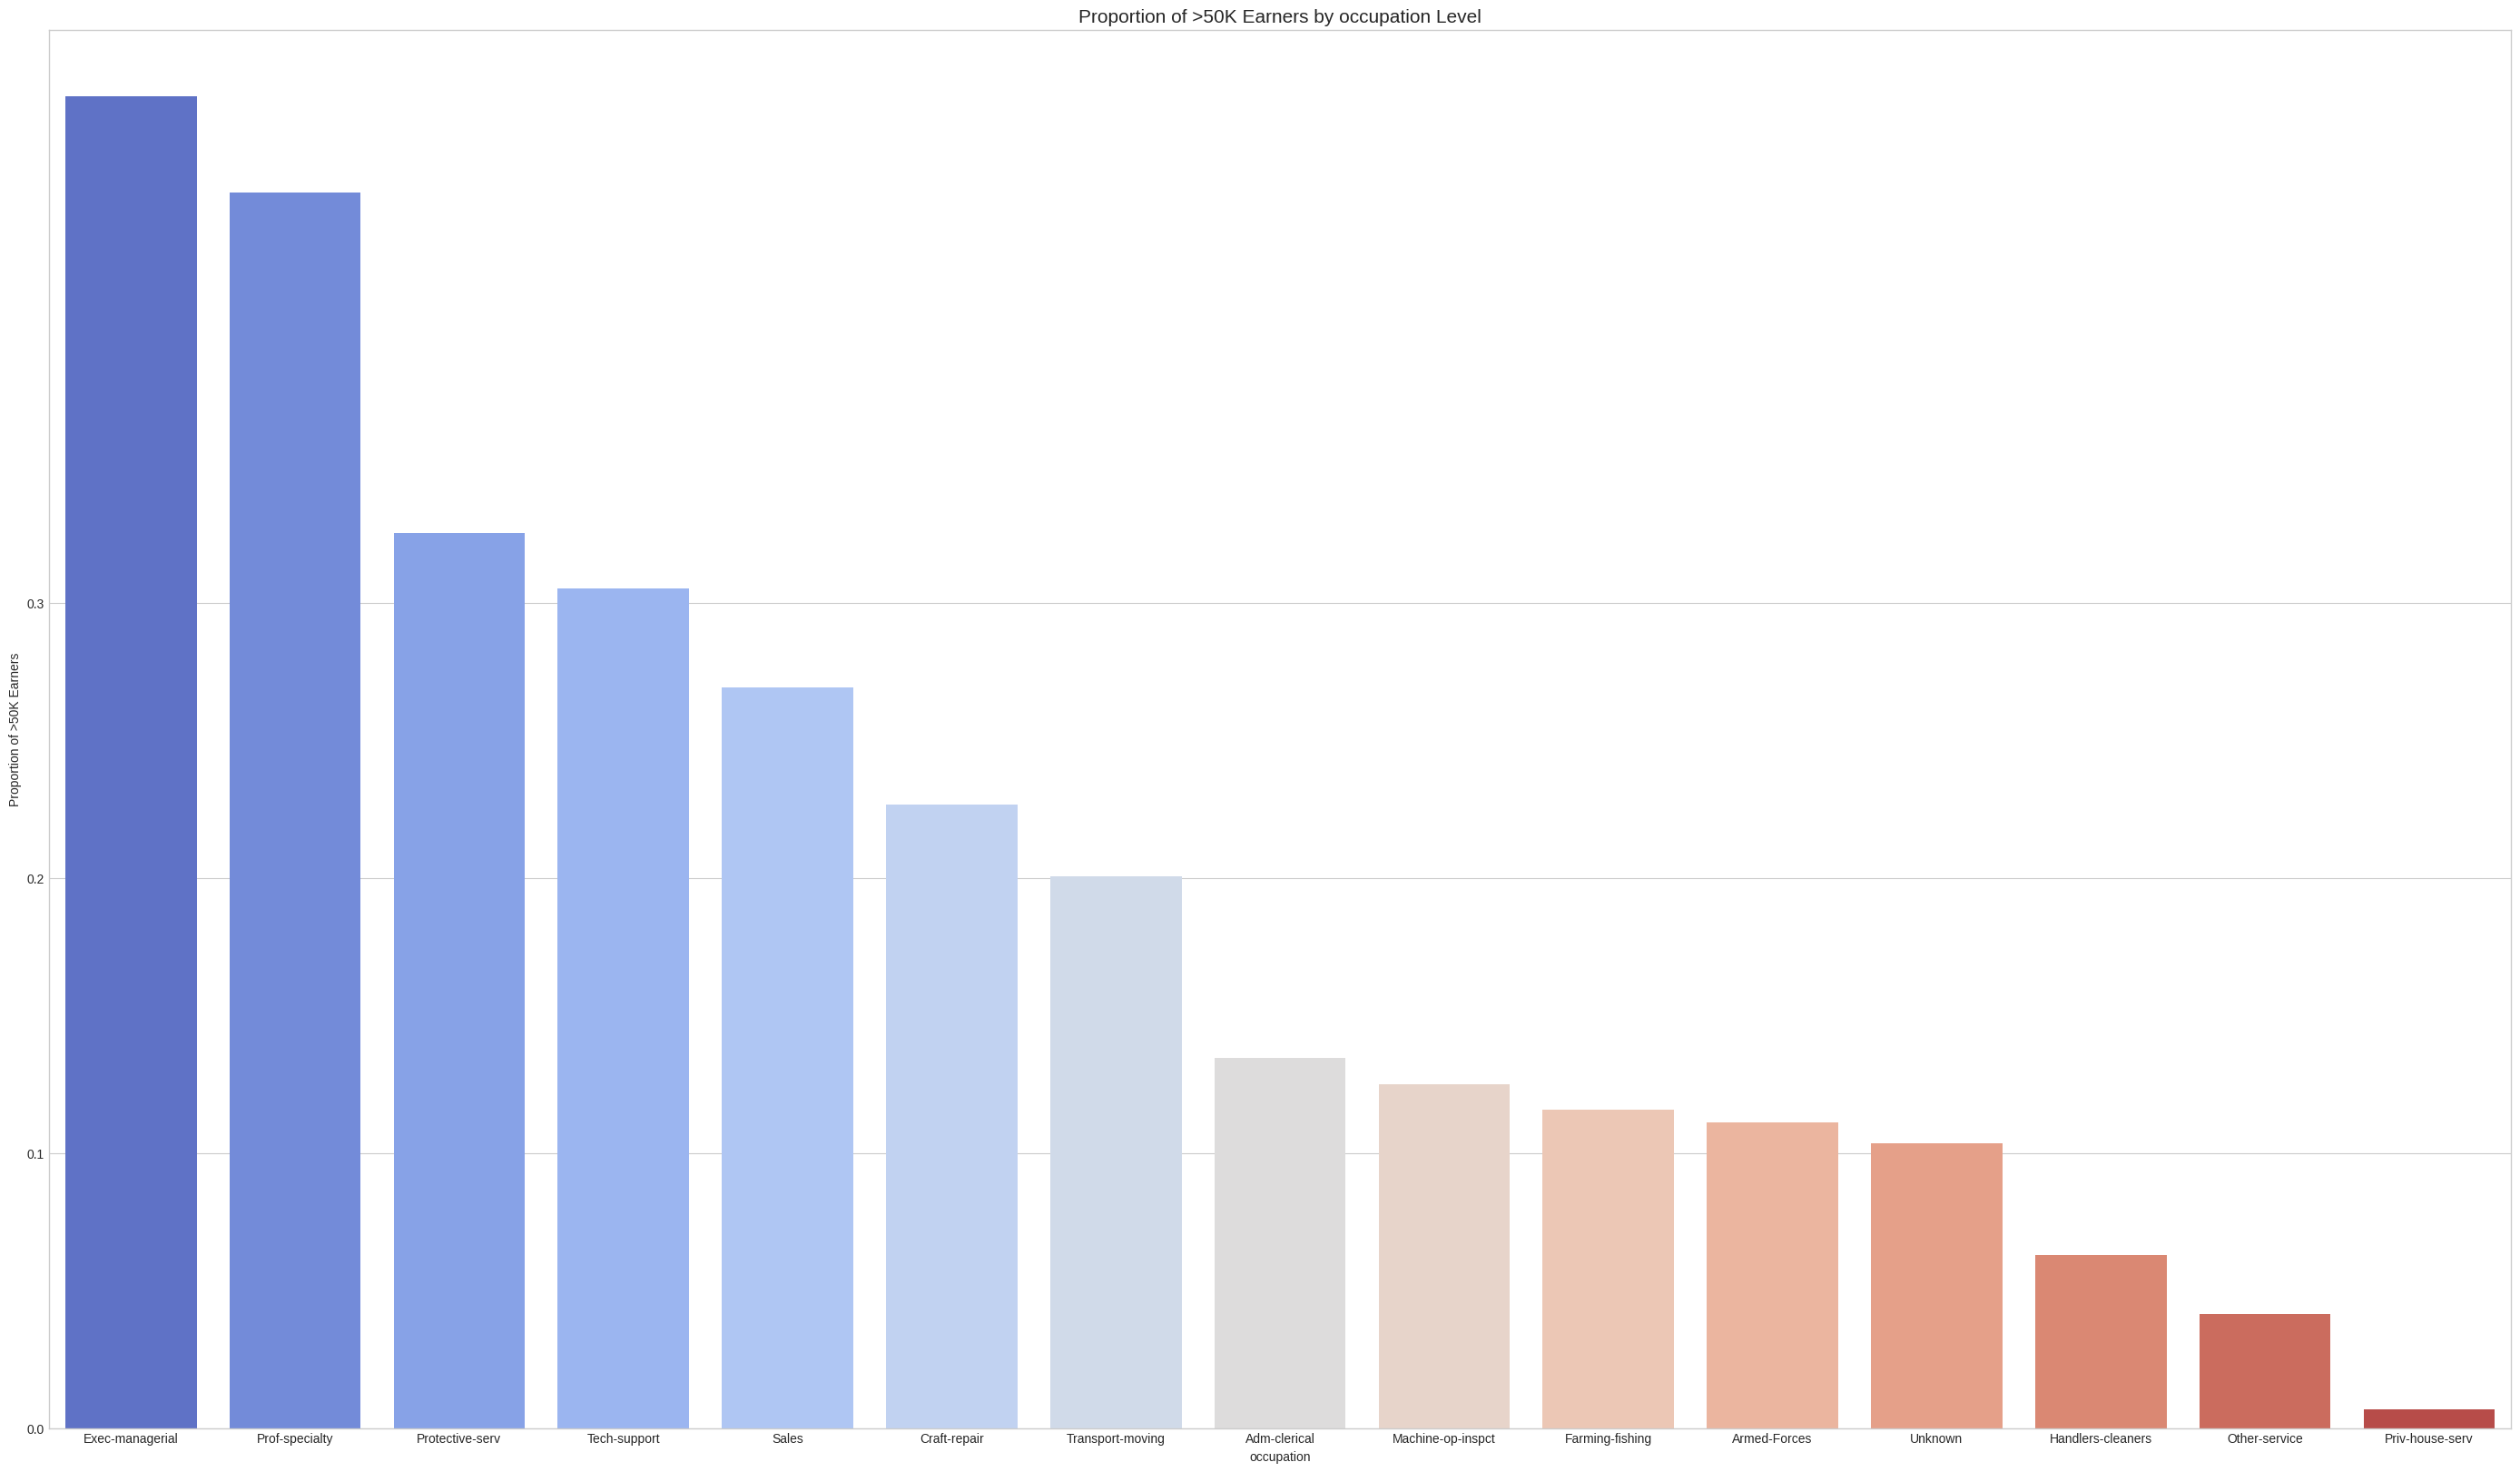

In [ ]:
plt.figure(figsize=(35, 20))
# 각 occupation 카테고리 내에서 income 비율을 계산하여 정규화된 막대 그래프를 그립니다.
prop_df = df.groupby('occupation')['income_binary'].mean().reset_index().sort_values('income_binary', ascending=False)
sns.barplot(x='occupation', y='income_binary', data=prop_df, palette='coolwarm')
plt.title('Proportion of >50K Earners by occupation Level', fontsize=15)
plt.ylabel('Proportion of >50K Earners')
plt.xlabel('occupation')
plt.yticks(np.arange(0, 0.4, 0.1))
plt.show()

#####| 영어 명칭                 | 한글 해석         | 설명                          |
| **Exec-managerial**   | 중간 관리자, 임원    | 경영, 관리직, 기업 임원 등            |
| **Prof-specialty**    | 전문직           | 의사, 변호사, 교수, 엔지니어 등 고학력 전문직 |
| **Protective-serv**   | 보호 서비스직       | 경찰, 소방관, 경호원 등              |
| **Tech-support**      | 기술 지원         | IT 지원, 기술 서비스 등             |
| **Sales**             | 영업            | 세일즈맨, 보험/자동차 판매원 등          |
| **Craft-repair**      | 수공업 및 수리직     | 배관공, 전기기사, 정비공 등            |
| **Transport-moving**  | 운송 및 이동 관련 직업 | 트럭 운전사, 택배, 기계 운전 등         |
| **Adm-clerical**      | 사무 및 행정직      | 사무보조, 비서, 회계 등              |
| **Machine-op-inspct** | 기계 조작 및 검사원   | 공장 생산라인, 품질 검사 등            |
| **Farming-fishing**   | 농업 및 어업       | 농부, 어부 등                    |
| **Armed-Forces**      | 군대            | 현역 군인                       |
| **Unknown**           | 직업 정보 없음      | 누락된 정보                      |
| **Handlers-cleaners** | 청소 및 단순 노동직   | 건물 청소, 쓰레기 수거 등             |
| **Other-service**     | 기타 서비스직       | 미용, 음식점 종업원, 주방보조 등         |
| **Priv-house-serv**   | 개인 가사 도우미     | 가정부, 베이비시터 등                |


###범주형 변수 분석


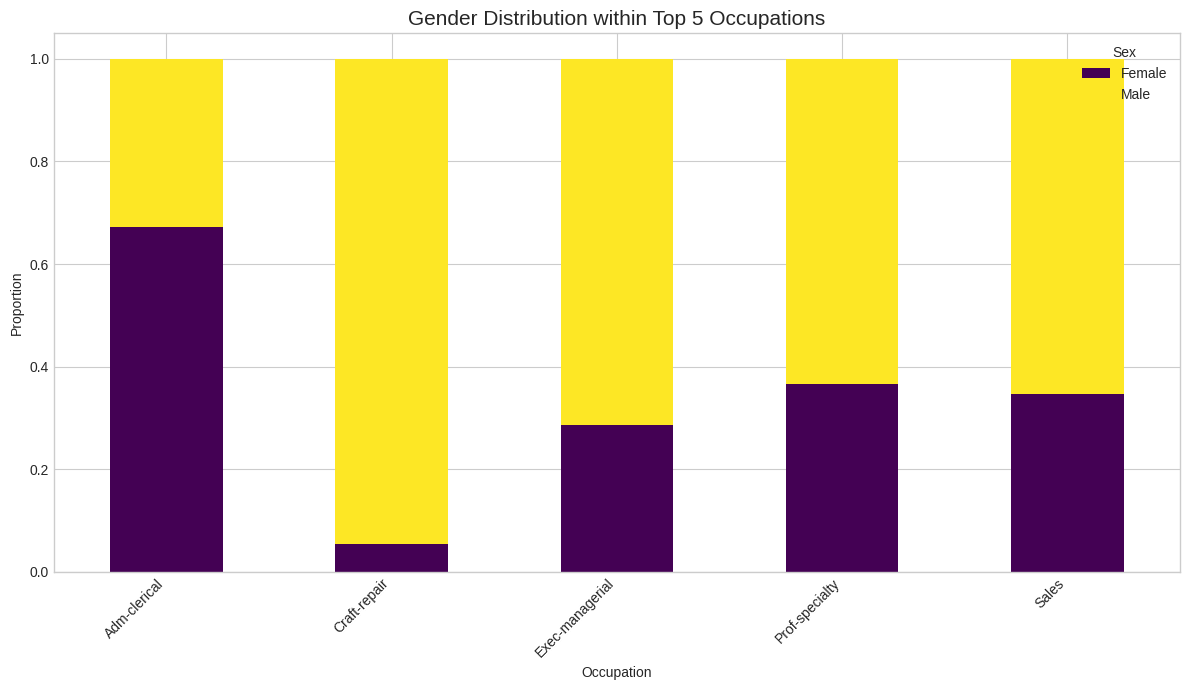

In [ ]:
# 상위 5개 직업군 추출
top_occupations = df['occupation'].value_counts().head(5).index

# 상위 5개 직업군에 해당하는 데이터 필터링
df_top_occupations = df[df['occupation'].isin(top_occupations)].copy()

# 직업군 및 성별로 그룹화하고 개수 계산
gender_by_occupation = df_top_occupations.groupby(['occupation', 'sex']).size().unstack(fill_value=0)

# 비율 계산 (각 직업군 내에서 남녀 비율)
gender_by_occupation_prop = gender_by_occupation.div(gender_by_occupation.sum(axis=1), axis=0)

# 시각화
gender_by_occupation_prop.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.title('Gender Distribution within Top 5 Occupations', fontsize=15)
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

#####고소득층 상위 5개의 직업군이 전체 인구의 상당한 비중을 차지하기 때문에 이 직업군의 성비를 살펴보면 남성이 고소득자의 비율이 더 높은 이유를 찾을 수 있을 것 같아서 살펴본 결과 탑5 직업군은 남성의 비중이 높았다.